<a href="https://colab.research.google.com/github/yeabwang/ML_zoom_camp/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
"""
Development workflow

1. Load the data - Done
2. Clean and consistency alignment on columns and data - Done
3. Data preparation framework design - Done
4. Shuffle dataset - Done
5. Split dataset - Done
6. Train with r2 regularization - Done
7. measure error with mean sqared error - Done
8. Choose better regularization and do fine tuning - Done
9. Plot - Done

"""

'\nDevelopment workflow\n\n1. Load the data - Done\n2. Clean and consistency alignment on columns and data - Done\n3. Data preparation framework design - Done\n4. Shuffle dataset - Done\n5. Split dataset - Done\n6. Train with r2 regularization - Done\n7. measure error with mean sqared error - Done\n8. Choose better regularization and do fine tuning - Done\n9. Plot\n\n'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

!wget $data

--2025-10-05 09:52:42--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.009s  

2025-10-05 09:52:42 (160 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [40]:
df = pd.read_csv(data)

In [41]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [42]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [43]:
obj_list = list(df.dtypes[df.dtypes == "object"].index)

for dtype in obj_list:
  df[dtype] = df[dtype].str.lower().str.replace(" ", "_")

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [44]:
for col in list(df.columns):
  print(col)
  print(list(df[col].value_counts().head().index))

make
['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']
model
['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'beetle_convertible']
year
[2015, 2016, 2017, 2014, 2012]
engine_fuel_type
['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel']
engine_hp
[200.0, 170.0, 210.0, 240.0, 285.0]
engine_cylinders
[4.0, 6.0, 8.0, 12.0, 5.0]
transmission_type
['automatic', 'manual', 'automated_manual', 'direct_drive', 'unknown']
driven_wheels
['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']
number_of_doors
[4.0, 2.0, 3.0]
market_category
['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']
vehicle_size
['compact', 'midsize', 'large']
vehicle_style
['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']
highway_mpg
[24, 23, 26, 22, 25]
city_mpg
[17, 16, 15, 18, 19]
popularity
[1385, 5657, 873, 2031, 1851]
msrp
[2000, 29995, 25995, 27995, 20995]


In [45]:
print("How many unique values it contains? ")
print(df.nunique())
print("--------------\nHow many null values it contains? ")
print(df.isnull().sum())

How many unique values it contains? 
make                   48
model                 914
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
market_category        71
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64
--------------
How many null values it contains? 
make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64


In [46]:
del df["market_category"] # Too many null values
del df["model"] # High varaince

In [47]:
df["engine_fuel_type"] = df["engine_fuel_type"].fillna(0)
df["engine_hp"] = df["engine_hp"].fillna(0)
df["engine_cylinders"] = df["engine_cylinders"].fillna(0)
df["number_of_doors"] = df["number_of_doors"].fillna(0)

In [48]:
print("How many unique values it contains? ")
print(df.nunique())
print("--------------\nHow many null values it contains? ")
print(df.isnull().sum())

How many unique values it contains? 
make                   48
year                   28
engine_fuel_type       11
engine_hp             357
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         4
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64
--------------
How many null values it contains? 
make                 0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64


In [49]:
# Do it only once
df["year"] =  df["year"].max() - df.year
df.year.head(), df.year.unique

(0    6
 1    6
 2    6
 3    6
 4    6
 Name: year, dtype: int64,
 <bound method Series.unique of 0         6
 1         6
 2         6
 3         6
 4         6
          ..
 11909     5
 11910     5
 11911     5
 11912     4
 11913    11
 Name: year, Length: 11914, dtype: int64>)

In [50]:
df = df.sample(frac=1, random_state=1).reset_index(drop=True)

df.head()

,make,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,lotus,0,premium_unleaded_(required),400.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,39,21,613,91900
1,aston_martin,3,premium_unleaded_(required),420.0,8.0,automated_manual,rear_wheel_drive,2.0,compact,convertible,21,14,259,136900
2,hyundai,2,regular_unleaded,311.0,6.0,automatic,rear_wheel_drive,4.0,large,sedan,29,18,1439,38000
3,suzuki,24,regular_unleaded,66.0,4.0,manual,four_wheel_drive,2.0,compact,convertible_suv,26,24,481,2000
4,mitsubishi,2,regular_unleaded,166.0,4.0,automatic,all_wheel_drive,4.0,midsize,4dr_suv,29,24,436,26195


In [51]:
n = len(df)
train_n = int(n * 0.6)
val_n = int(n * 0.2)
test_n = n - train_n + val_n

train_n, val_n, test_n

(7148, 2382, 7148)

In [52]:
# divide x and y
full_y = df['msrp']
del df['msrp']

In [53]:
train_ds = df[:train_n]
val_ds = df[train_n: train_n+val_n]
test_ds = df[train_n+val_n:]
len(train_ds), len(val_ds), len(test_ds), "||"  , train_ds.shape, val_ds.shape, test_ds.shape

(7148, 2382, 2384, '||', (7148, 13), (2382, 13), (2384, 13))

In [54]:
# divide y

train_y = full_y[:train_n]
val_y = full_y[train_n: train_n+val_n]
test_y = full_y[train_n+val_n:]

len(train_y), len(val_y), len(test_y)

(7148, 2382, 2384)

In [55]:
print(train_ds.iloc[1:5])

print("Prices\n")
print(train_y.iloc[1:5])

           make  year             engine_fuel_type  engine_hp  \
1  aston_martin     3  premium_unleaded_(required)      420.0   
2       hyundai     2             regular_unleaded      311.0   
3        suzuki    24             regular_unleaded       66.0   
4    mitsubishi     2             regular_unleaded      166.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
1               8.0  automated_manual  rear_wheel_drive              2.0   
2               6.0         automatic  rear_wheel_drive              4.0   
3               4.0            manual  four_wheel_drive              2.0   
4               4.0         automatic   all_wheel_drive              4.0   

  vehicle_size    vehicle_style  highway_mpg  city_mpg  popularity  
1      compact      convertible           21        14         259  
2        large            sedan           29        18        1439  
3      compact  convertible_suv           26        24         481  
4      midsize   

In [56]:
base_columns = ["engine_hp", "year", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
categorical_cols = ["make", "engine_fuel_type", "transmission_type", "driven_wheels", "vehicle_style", "vehicle_size"]
num_doors = [2, 3, 4]

In [57]:
cat_top_vals = {}

for cat in categorical_cols:
  cat_top_vals[cat] = list(df[cat].value_counts().head(5).index)

cat_top_vals

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large']}

In [58]:
def prepare_x(df):
    df = df.copy()
    cols = base_columns.copy()

    for num in num_doors:
        df[f"num_doors_{num}"] = (df.number_of_doors == num).astype(int)
        cols.append(f"num_doors_{num}")

    for col, values in cat_top_vals.items():
        for value in values:
            df[f"{col}_{value}"] = (df[col] == value).astype(int)
            cols.append(f"{col}_{value}")

    return df[cols].values


In [59]:
training_dataset= prepare_x(train_ds)
validation_dataset = prepare_x(val_ds)
test_dataset = prepare_x(test_ds)

training_dataset, validation_dataset, test_dataset


training_dataset.shape, validation_dataset.shape, test_dataset.shape

((7148, 36), (2382, 36), (2384, 36))

In [60]:
training_dataset

array([[400.,   0.,   6., ...,   1.,   0.,   0.],
       [420.,   3.,   8., ...,   1.,   0.,   0.],
       [311.,   2.,   6., ...,   0.,   0.,   1.],
       ...,
       [281.,   1.,   6., ...,   0.,   1.,   0.],
       [315.,   1.,   6., ...,   0.,   1.,   0.],
       [160.,   2.,   4., ...,   1.,   0.,   0.]])

In [61]:
y_train = np.log1p(train_y)
y_val = np.log1p(val_y)
y_test = np.log1p(test_y)

In [62]:
def train_with_r2(x, y, r = 0.001):
  ones = np.ones(x.shape[0])
  x = np.column_stack([ones, x])

  xtx = x.T.dot(x)
  xtx += r * np.eye(xtx.shape[0])

  xtx_inv = np.linalg.inv(xtx)
  w_full = xtx_inv.dot(x.T).dot(y)

  return w_full[0], w_full[1:]

In [63]:
def rmse(y, y_pred):
  sm = (y-y_pred) ** 2
  mse = sm.mean()
  return np.sqrt(mse)

In [64]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_x(train_ds)
    w0, w = train_with_r2(X_train, y_train, r=r)

    X_val = prepare_x(val_ds)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(f"r={r:7.5f}, RMSE={score:.4f}")

r=0.00000, RMSE=23.6143
r=0.00001, RMSE=0.4638
r=0.00010, RMSE=0.4638
r=0.00100, RMSE=0.4638
r=0.10000, RMSE=0.4640
r=1.00000, RMSE=0.4672
r=10.00000, RMSE=0.4851


In [68]:
# ---- FINAL MODEL ----
training_combined = pd.concat([train_ds, val_ds]).reset_index(drop=True)
y_combined = np.concatenate([y_train, y_val])

X_combined = prepare_x(training_combined)
X_test = prepare_x(test_ds)

w0, w = train_with_r2(X_combined, y_combined, r=0.001)

# Predict and reverse log
y_pred_log = w0 + X_test.dot(w)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# RMSE in log space
rmse_log = rmse(y_test, y_pred_log)
print("Log-space RMSE:", rmse_log)

# RMSE in price space
rmse_price = rmse(np.expm1(y_test), np.expm1(y_pred_log))
print("Price-space RMSE:", rmse_price)


Log-space RMSE: 0.5213819851139637
Price-space RMSE: 50934.85703801617


<Axes: xlabel='msrp', ylabel='Count'>

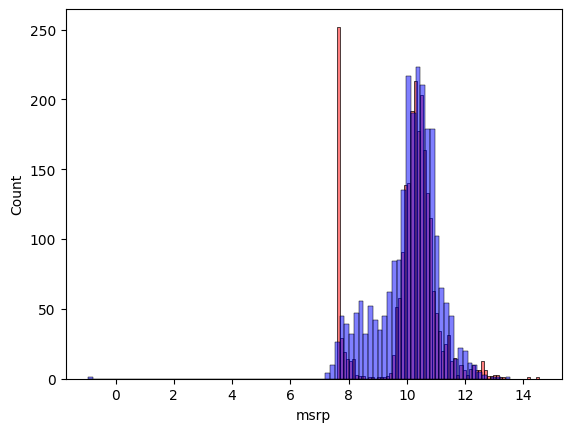

In [69]:
sns.histplot(y_test, color="red", alpha=0.5)
sns.histplot(y_pred_log, color="blue", alpha=0.5)